In [1]:
import imageio
import metaimageio

In [2]:
from project.config import PROJECT_ROOT

image, meta = metaimageio.read(PROJECT_ROOT / "data/LUNA16/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260.mhd")

In [3]:
type(image)

numpy.ndarray

In [4]:
image.shape

(121, 512, 512)

In [5]:
meta

{'ObjectType': 'Image',
 'NDims': 3,
 'CompressedData': False,
 'BinaryData': True,
 'BinaryDataByteOrderMSB': False,
 'Offset': array([-198.100006, -195.      , -335.209991]),
 'TransformMatrix': array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 'CenterOfRotation': array([0., 0., 0.]),
 'AnatomicalOrientation': 'RAI',
 'ElementSpacing': array([0.76171899, 0.76171899, 2.5       ]),
 'DimSize': array([512, 512, 121]),
 'ElementType': numpy.int16}

In [6]:
from collections import namedtuple
import os

File = namedtuple('File', ['filename', 'path', 'extension', 'size', 'dirpath'])

ROOT_FOLDER = PROJECT_ROOT / "data/LUNA16"

all_files = []
for dirpath, dirnames, filenames in os.walk(ROOT_FOLDER):
    for f in filenames:
        fp = os.path.join(dirpath, f)
        extension = fp.split(".")[-1]
        size = os.path.getsize(fp)
        f = f[:-4]
        individual_file = File(f, fp, extension, size, dirpath)
        all_files.append(individual_file)

In [7]:
all_files

[File(filename='annotations', path='D:\\Code\\CISC3027\\project\\data\\LUNA16\\annotations.csv', extension='csv', size=136986, dirpath='D:\\Code\\CISC3027\\project\\data\\LUNA16'),
 File(filename='candidates', path='D:\\Code\\CISC3027\\project\\data\\LUNA16\\candidates.csv', extension='csv', size=55427881, dirpath='D:\\Code\\CISC3027\\project\\data\\LUNA16'),
 File(filename='candidates_V2', path='D:\\Code\\CISC3027\\project\\data\\LUNA16\\candidates_V2.csv', extension='csv', size=72058556, dirpath='D:\\Code\\CISC3027\\project\\data\\LUNA16'),
 File(filename='sampleSubmission', path='D:\\Code\\CISC3027\\project\\data\\LUNA16\\sampleSubmission.csv', extension='csv', size=740, dirpath='D:\\Code\\CISC3027\\project\\data\\LUNA16'),
 File(filename='annotations', path='D:\\Code\\CISC3027\\project\\data\\LUNA16\\evaluationScript\\annotations\\annotations.csv', extension='csv', size=136986, dirpath='D:\\Code\\CISC3027\\project\\data\\LUNA16\\evaluationScript\\annotations'),
 File(filename='anno

In [8]:
import random

random_uid = random.choice([file.filename for file in all_files if file.extension =="mhd"])
print(f"The Random UID chosen for this notebook is: {random_uid}")
notebook_files = [file for file in all_files if file.filename == random_uid]
print(f"There were {len(notebook_files)} files found with this uid., they are:\nSize \t Ext. \t Folder.")
for file in notebook_files:
    print(round(file.size / (1024 **2), 4), "\t", file.extension, "\t", file.path)
raw = [file for file in notebook_files if file.extension == "raw"][0]
mhd = [file for file in notebook_files if file.extension == "mhd"]

The Random UID chosen for this notebook is: 1.3.6.1.4.1.14519.5.2.1.6279.6001.614147706162329660656328811671
There were 3 files found with this uid., they are:
Size 	 Ext. 	 Folder.
0.0004 	 mhd 	 D:\Code\CISC3027\project\data\LUNA16\seg-lungs-LUNA16\1.3.6.1.4.1.14519.5.2.1.6279.6001.614147706162329660656328811671.mhd
0.0004 	 mhd 	 D:\Code\CISC3027\project\data\LUNA16\subset3\1.3.6.1.4.1.14519.5.2.1.6279.6001.614147706162329660656328811671.mhd
66.5 	 raw 	 D:\Code\CISC3027\project\data\LUNA16\subset3\1.3.6.1.4.1.14519.5.2.1.6279.6001.614147706162329660656328811671.raw


In [9]:
mhd[0].path

'D:\\Code\\CISC3027\\project\\data\\LUNA16\\seg-lungs-LUNA16\\1.3.6.1.4.1.14519.5.2.1.6279.6001.614147706162329660656328811671.mhd'

In [10]:
import SimpleITK as sitk

mhd_image = sitk.ReadImage(mhd[0].path)

In [11]:
mhd_image

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'itk::simple::Image *' at 0x000002D04C469020> >

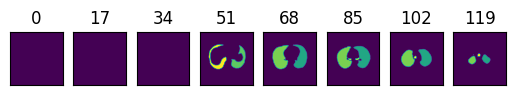

In [12]:
from matplotlib import pyplot as plt
import numpy as np

mhd_image_array = np.array(sitk.GetArrayFromImage(mhd_image), dtype=np.float32)
NUM_IMAGES = 8
fig, ax = plt.subplots(1, NUM_IMAGES)
for i in range(NUM_IMAGES):
    spacing = round(mhd_image_array.shape[0] / NUM_IMAGES)
    idx = i * spacing
    image = mhd_image_array[idx,:,:]
    ax[i].imshow(image)
    ax[i].set_title(f"{idx}")
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
plt.show()

In [13]:
mhd_image = sitk.ReadImage(PROJECT_ROOT / "data/LUNA16/seg-lungs-LUNA16/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.mhd")
mhd_image_array = np.array(sitk.GetArrayFromImage(mhd_image), dtype=np.float32)

In [20]:
import pandas as pd
from glob import glob

def get_filename(file_list: list[str], case):
    for f in file_list:
        if case in f:
            return f

subset_index = 0

luna_path = PROJECT_ROOT / "data" / "LUNA16"
output_path = PROJECT_ROOT / "data" / "LUNA16" / "mask"

luna_subset_path = luna_path / ("subset" + str(subset_index))
luna_subset_mask_path = output_path / ("subset" + str(subset_index))

if not os.path.exists(luna_subset_mask_path):
    os.makedirs(luna_subset_mask_path)
subset_file_list = glob(f"{luna_subset_path}/*.mhd")

# The locations of the nodes
df_node = pd.read_csv(luna_path / "annotations.csv")
df_node["file"] = df_node["seriesuid"].map(lambda uid: get_filename(subset_file_list, uid))
df_node = df_node.dropna()
df_node

,seriesuid,coordX,coordY,coordZ,diameter_mm,file
23,1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896...,-100.567944,67.260517,-231.816619,6.440879,D:\Code\CISC3027\project\data\LUNA16\subset0\1...
25,1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524...,46.188539,48.402806,-108.578632,13.596471,D:\Code\CISC3027\project\data\LUNA16\subset0\1...
26,1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524...,36.392044,76.771663,-123.321911,4.343200,D:\Code\CISC3027\project\data\LUNA16\subset0\1...
28,1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674...,136.434059,117.765579,-181.947817,4.681382,D:\Code\CISC3027\project\data\LUNA16\subset0\1...
86,1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048...,145.967465,-161.197634,-312.071347,6.378436,D:\Code\CISC3027\project\data\LUNA16\subset0\1...
...,...,...,...,...,...,...
1125,1.3.6.1.4.1.14519.5.2.1.6279.6001.868211851413...,-22.951826,78.571156,-136.901025,6.430802,D:\Code\CISC3027\project\data\LUNA16\subset0\1...
1137,1.3.6.1.4.1.14519.5.2.1.6279.6001.898642529028...,-42.200674,92.207156,-566.589551,4.678130,D:\Code\CISC3027\project\data\LUNA16\subset0\1...
1138,1.3.6.1.4.1.14519.5.2.1.6279.6001.898642529028...,74.399625,112.651026,-534.715881,4.581767,D:\Code\CISC3027\project\data\LUNA16\subset0\1...
1141,1.3.6.1.4.1.14519.5.2.1.6279.6001.905371958588...,109.116637,48.589511,-120.892058,21.583112,D:\Code\CISC3027\project\data\LUNA16\subset0\1...
